# Simple Linear Regression

## 1. Import required Libraries

In [546]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## 2. Import Dataset

In [547]:
df_raw = pd.read_csv(r"house_prices_switzerland.csv", sep=",")
df_raw

,ID,HouseType,Size,Price,LotSize,Balcony,LivingSpace,NumberRooms,YearBuilt,Locality,PostalCode
0,4000745035,SINGLE_HOUSE,L,1249500.0,NaN,True,270.0,7.5,NaN,Genestrerio,6852
1,4000781039,VILLA,M,1389150.0,640.0,True,230.0,8.5,2024.0,Vétroz,1963
2,4000744528,VILLA,L,NaN,NaN,True,880.0,14.0,NaN,Lugano,6900
3,4000744292,MULTIPLE_DWELLING,L,NaN,NaN,True,NaN,NaN,NaN,Grono,6537
4,4000745275,SINGLE_HOUSE,L,NaN,NaN,True,170.0,7.5,NaN,Cadempino,6814
...,...,...,...,...,...,...,...,...,...,...,...
968,4000563553,SINGLE_HOUSE,L,1609650.0,734.0,NaN,230.0,8.5,1996.0,Payerne,1530
969,4000542556,SINGLE_HOUSE,L,1014300.0,601.0,NaN,250.0,11.0,1903.0,Le Locle,2400
970,4000542555,BIFAMILIAR_HOUSE,L,2050650.0,554.0,True,240.0,7.5,2023.0,Les Cullayes,1080
971,4000487294,SINGLE_HOUSE,L,2587200.0,NaN,NaN,510.0,12.5,1993.0,Vacallo,6833


In [548]:
df_raw.shape

(973, 11)

In [549]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           973 non-null    int64  
 1   HouseType    973 non-null    object 
 2   Size         973 non-null    object 
 3   Price        908 non-null    float64
 4   LotSize      873 non-null    float64
 5   Balcony      679 non-null    object 
 6   LivingSpace  879 non-null    float64
 7   NumberRooms  905 non-null    float64
 8   YearBuilt    830 non-null    float64
 9   Locality     973 non-null    object 
 10  PostalCode   973 non-null    int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 83.7+ KB


In [550]:
df_raw.isna().sum()

ID               0
HouseType        0
Size             0
Price           65
LotSize        100
Balcony        294
LivingSpace     94
NumberRooms     68
YearBuilt      143
Locality         0
PostalCode       0
dtype: int64

## 3. Data Cleaning

In [551]:
df_clean = df_raw.copy()
df_clean.YearBuilt = df_clean.YearBuilt.astype("int64", errors="ignore")
df_clean = df_clean.dropna(subset=["HouseType", "Size", "Price", "LotSize",	"Balcony", "LivingSpace", "NumberRooms", "YearBuilt"]).reset_index(drop=True)
df_clean

,ID,HouseType,Size,Price,LotSize,Balcony,LivingSpace,NumberRooms,YearBuilt,Locality,PostalCode
0,4000781039,VILLA,M,1389150.0,640.0,True,230.0,8.5,2024.0,Vétroz,1963
1,3003178554,SINGLE_HOUSE,S,1174530.0,876.0,False,210.0,8.5,2023.0,Corban,2826
2,3003181491,SINGLE_HOUSE,L,1764000.0,504.0,False,280.0,9.5,2024.0,Rothenbrunnen,7405
3,4000391531,SINGLE_HOUSE,S,1279630.0,362.0,True,180.0,7.5,2023.0,Biel/Bienne,2500
4,4000391524,SINGLE_HOUSE,S,1301680.0,466.0,True,180.0,8.5,2023.0,Biel/Bienne,2500
...,...,...,...,...,...,...,...,...,...,...,...
471,4000699225,SINGLE_HOUSE,L,1168650.0,715.0,True,300.0,9.5,1929.0,Huttwil,4950
472,4000683171,BIFAMILIAR_HOUSE,L,4336500.0,403.0,True,430.0,8.5,1989.0,Egg b. Zürich,8132
473,4000672443,BIFAMILIAR_HOUSE,L,1543500.0,361.0,True,220.0,8.5,2003.0,Muolen,9313
474,4000666177,SINGLE_HOUSE,L,2168250.0,258.0,True,190.0,8.5,2023.0,Konolfingen,3510


## 4. Data Encoding

Encoding = the process of transforming categorical data into numeric data

Types of encoding: 
- Binary Encoding = conversion of boolean values (True/False) to int (1/0)
- Label Encoding = Label Encoding assigns each unique category value an integer value (e.g. 'small' -> 0, 'medium' -> 1, 'large' -> 2)
- One-Hot Encoding = One-Hot Encoding creates a new column for each unique category value, and assigns a 1 or 0 (True or False) to each column

In [552]:
df_encoded = df_clean.copy()

In [553]:
# Binary Encoding for Balcony col
df_encoded.Balcony = df_encoded.Balcony.astype(int)

In [554]:
# One-Hot Encoding for Size col
df_encoded = pd.get_dummies(df_encoded, columns=['Size'])   # One-Hot Encoding for Size column
df_encoded.iloc[:, -3:] = df_encoded.iloc[:, -3:].astype(int)   # Binary Encoding for 3 Size cols

In [555]:
# One-Hot Encoding for HouseType col
df_encoded = pd.get_dummies(df_encoded, columns=['HouseType'])   # One-Hot Encoding for Size column
df_encoded[df_encoded.filter(regex="HouseType").columns] = df_encoded.filter(regex="HouseType").astype(int)   # Binary Encoding for 3 Size cols

In [556]:
df_encoded

,ID,Price,LotSize,Balcony,LivingSpace,NumberRooms,YearBuilt,Locality,PostalCode,Size_L,Size_M,Size_S,HouseType_BIFAMILIAR_HOUSE,HouseType_CHALET,HouseType_FARM_HOUSE,HouseType_MULTIPLE_DWELLING,HouseType_ROW_HOUSE,HouseType_SINGLE_HOUSE,HouseType_TERRACE_HOUSE,HouseType_VILLA
0,4000781039,1389150.0,640.0,1,230.0,8.5,2024.0,Vétroz,1963,0,1,0,0,0,0,0,0,0,0,1
1,3003178554,1174530.0,876.0,0,210.0,8.5,2023.0,Corban,2826,0,0,1,0,0,0,0,0,1,0,0
2,3003181491,1764000.0,504.0,0,280.0,9.5,2024.0,Rothenbrunnen,7405,1,0,0,0,0,0,0,0,1,0,0
3,4000391531,1279630.0,362.0,1,180.0,7.5,2023.0,Biel/Bienne,2500,0,0,1,0,0,0,0,0,1,0,0
4,4000391524,1301680.0,466.0,1,180.0,8.5,2023.0,Biel/Bienne,2500,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,4000699225,1168650.0,715.0,1,300.0,9.5,1929.0,Huttwil,4950,1,0,0,0,0,0,0,0,1,0,0
472,4000683171,4336500.0,403.0,1,430.0,8.5,1989.0,Egg b. Zürich,8132,1,0,0,1,0,0,0,0,0,0,0
473,4000672443,1543500.0,361.0,1,220.0,8.5,2003.0,Muolen,9313,1,0,0,1,0,0,0,0,0,0,0
474,4000666177,2168250.0,258.0,1,190.0,8.5,2023.0,Konolfingen,3510,1,0,0,0,0,0,0,0,1,0,0


In [557]:
df_encoded.dtypes

ID                               int64
Price                          float64
LotSize                        float64
Balcony                          int32
LivingSpace                    float64
NumberRooms                    float64
YearBuilt                      float64
Locality                        object
PostalCode                       int64
Size_L                           int32
Size_M                           int32
Size_S                           int32
HouseType_BIFAMILIAR_HOUSE       int32
HouseType_CHALET                 int32
HouseType_FARM_HOUSE             int32
HouseType_MULTIPLE_DWELLING      int32
HouseType_ROW_HOUSE              int32
HouseType_SINGLE_HOUSE           int32
HouseType_TERRACE_HOUSE          int32
HouseType_VILLA                  int32
dtype: object

=> All of the required columns are encoded to a numerical value and we can proceed to the Correlation Check and Regressions

## 5. Check Correlation

Before proceeding with the Linear Regression, let's check the **Pearson's correlation coefficient**.  
This coefficient measures the linear relationship between two variables. It ranges from -1 to 1,  
where:

- 1 means a perfect positive linear relationship,
- -1 means a perfect negative linear relationship,
- 0 means no linear relationship.

- (-0.1 to -0.3) or (0.1 to 0.3): Weak negative or positive linear relationship.
- (-0.3 to -0.5) or (0.3 to 0.5): Moderate negative or positive linear relationship.
- (-0.5 to -1.0) or (0.5 to 1.0): Strong negative or positive linear relationship.

In [558]:
round(df_encoded.corr(numeric_only=True)["Price"], 3)

ID                            -0.101
Price                          1.000
LotSize                       -0.001
Balcony                        0.080
LivingSpace                    0.638
NumberRooms                    0.286
YearBuilt                      0.129
PostalCode                     0.048
Size_L                        -0.171
Size_M                         0.214
Size_S                        -0.064
HouseType_BIFAMILIAR_HOUSE    -0.052
HouseType_CHALET               0.078
HouseType_FARM_HOUSE          -0.017
HouseType_MULTIPLE_DWELLING   -0.007
HouseType_ROW_HOUSE           -0.064
HouseType_SINGLE_HOUSE        -0.090
HouseType_TERRACE_HOUSE       -0.016
HouseType_VILLA                0.317
Name: Price, dtype: float64

Based on the results above, if the price is analyzed as independent variable, the LivingSpace (corr_coef = 0.620 [srong positive correlation]) and NumberRooms (corr_coef = 0.239 [weak positive correlation]) dependent variables can be analyzed.

## 6 Simple Linear Regression (Living Space x Price)

Y = mX + c 

Y = dependent Variable  
X = independent Variable  
m = slope (in ML called coefficient)  
c = intercept  
  
m, c => training parameters

### 6.1 Define Variables

In [559]:
ml_df1 = df_encoded[["LivingSpace", "Price"]]
X = ml_df1["LivingSpace"]
y = ml_df1["Price"]

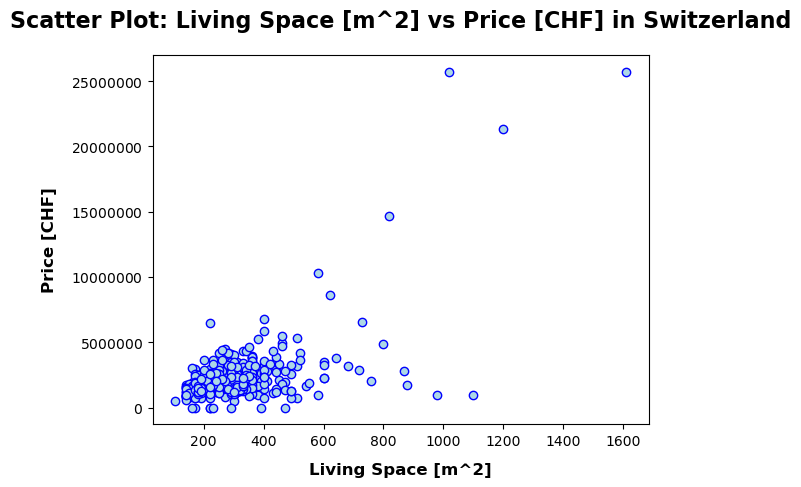

In [560]:
# plot data
plt.scatter(X, y, c="lightblue", edgecolors="blue")
plt.title("Scatter Plot: Living Space [m^2] vs Price [CHF] in Switzerland", 
          pad=20, loc="center", 
          fontdict={"size":16, 
                    "weight": "bold",
                    })
plt.xlabel("Living Space [m^2]", labelpad=10, fontdict={"size":12, 
                    "weight": "bold",
                    })
plt.ylabel("Price [CHF]", labelpad=10, fontdict={"size":12, 
                    "weight": "bold",
                    })
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

### 6.2 Split Data into Training and Test Datasets

In [561]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.4,    # 40% for testing (60% for training)
                                                    random_state = 88)  # Controls the shuffling applied to the data before applying the split (reproducible)

In [562]:
# reshape the one-dimentional training arrays to 2D 
X_train = np.array(X_train).reshape(-1, 1)
# reshape the one-dimentional test arrays to 2D 
X_test = np.array(X_test).reshape(-1, 1)

In [563]:
# TRAINING OF MODEL
lr = LinearRegression() 
lr.fit(X_train, y_train)   # fit the X and y training data to the linear regression model (find best line to minimize sum of all point distances to the reg line)

# check the resulting training parameters 
c = lr.intercept_
m = lr.coef_

print(f"The intercept c for the linear regression is: {round(c,2)}")
print(f"\nThe coefficients m for the linear regression are:\n{m}")

The intercept c for the linear regression is: -664855.77

The coefficients m for the linear regression are:
[9690.11578288]


### 6.3 Predict Price (training data)

In [564]:
# when we know m, c and X_train data, we can predict the Y_pred_train
Y_pred_train = m*X_train + c 
Y_pred_train.flatten()

array([ 1854574.33510225,  1079365.07247183,  2145277.80858865,
        1660772.01944464,  3695696.33384948,  2048376.65075985,
         895252.87259711,  2823585.91339026,  2145277.80858865,
         691760.44115662,   827422.06211695,  1757673.17727344,
        1176266.23030063,  2532882.43990386,  5536818.33259671,
        3598795.17602068,  1079365.07247183,   691760.44115662,
        1466969.70378704,  1176266.23030063,  1466969.70378704,
        2145277.80858865,  2823585.91339026,  2145277.80858865,
        2532882.43990386,  4567806.7543087 ,  3792597.49167828,
        1757673.17727344,  2145277.80858865,  1757673.17727344,
         982463.91464303,  2145277.80858865,  1757673.17727344,
        4083300.96516469,  3211190.54470547,  1757673.17727344,
        3308091.70253427,  1563870.86161584,  1079365.07247183,
        1001844.14620879,   788661.59898543,  2145277.80858865,
        1757673.17727344,  1660772.01944464,  1176266.23030063,
        3211190.54470547,  1176266.23030

In [565]:
# Another method is to use predict method of LinearRegression class (better method)
lr.predict(X_train).flatten()

array([ 1854574.33510225,  1079365.07247183,  2145277.80858865,
        1660772.01944464,  3695696.33384948,  2048376.65075985,
         895252.87259711,  2823585.91339026,  2145277.80858865,
         691760.44115662,   827422.06211695,  1757673.17727344,
        1176266.23030063,  2532882.43990386,  5536818.33259671,
        3598795.17602068,  1079365.07247183,   691760.44115662,
        1466969.70378704,  1176266.23030063,  1466969.70378704,
        2145277.80858865,  2823585.91339026,  2145277.80858865,
        2532882.43990386,  4567806.7543087 ,  3792597.49167828,
        1757673.17727344,  2145277.80858865,  1757673.17727344,
         982463.91464303,  2145277.80858865,  1757673.17727344,
        4083300.96516469,  3211190.54470547,  1757673.17727344,
        3308091.70253427,  1563870.86161584,  1079365.07247183,
        1001844.14620879,   788661.59898543,  2145277.80858865,
        1757673.17727344,  1660772.01944464,  1176266.23030063,
        3211190.54470547,  1176266.23030

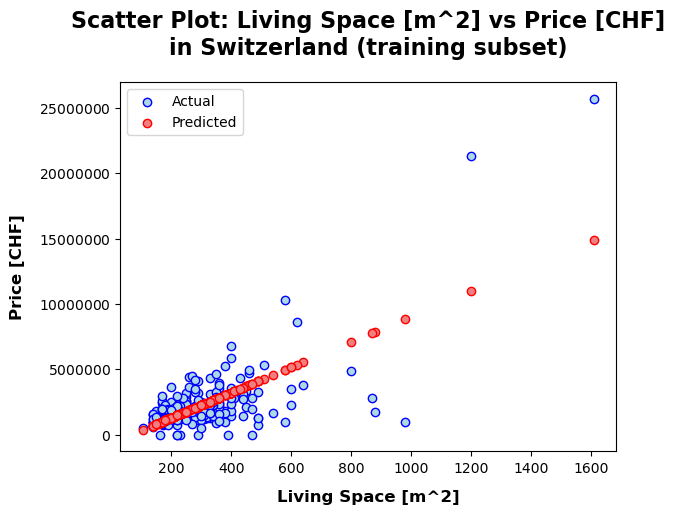

In [566]:
# plot actual vs predicte prices
plt.scatter(X_train,y_train, color="lightblue", edgecolors="blue", label="Actual", marker='o')
plt.scatter(X_train,Y_pred_train, color="lightcoral", edgecolors="red", label="Predicted", marker='o')
plt.title("Scatter Plot: Living Space [m^2] vs Price [CHF]\nin Switzerland (training subset)", 
          pad=20, loc="center", 
          fontdict={"size":16, 
                    "weight": "bold",
                    })
plt.xlabel("Living Space [m^2]", labelpad=10, fontdict={"size":12, 
                    "weight": "bold",
                    })
plt.ylabel("Price [CHF]", labelpad=10, fontdict={"size":12, 
                    "weight": "bold",
                    })
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend()
plt.show()

### 6.4 Predict Price (testing data)

In [567]:
y_pred_test = lr.predict(X_test)
y_pred_test

array([2726684.75556146, 2145277.80858865, 1466969.70378704,
       2145277.80858865,  885562.75681423, 9994271.59272159,
       1079365.07247183, 2145277.80858865, 2823585.91339026,
       1757673.17727344, 3889498.64950708, 1273167.38812944,
        982463.91464303, 2242178.96641745, 1466969.70378704,
       1176266.23030063, 7281039.17351514,  769281.36741967,
       2532882.43990386, 1660772.01944464, 2823585.91339026,
       1176266.23030063, 1176266.23030063, 1273167.38812944,
       1757673.17727344, 2629783.59773266, 2048376.65075985,
       1563870.86161584, 2145277.80858865, 1951475.49293105,
       2242178.96641745, 1757673.17727344,  691760.44115662,
       2145277.80858865, 1660772.01944464, 2823585.91339026,
       6408928.75305593,  875872.64103135, 1757673.17727344,
       2048376.65075985,  982463.91464303, 4374004.43865109,
       1757673.17727344, 2048376.65075985, 1176266.23030063,
       3598795.17602068, 1273167.38812944, 2145277.80858865,
       2823585.91339026,

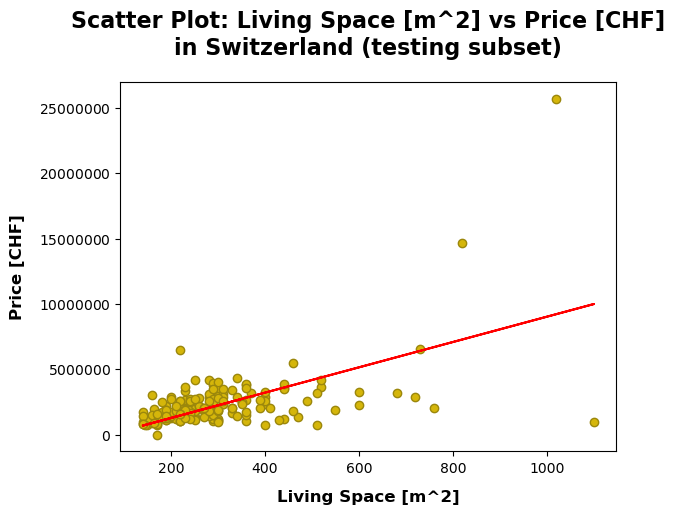

In [570]:
plt.scatter(X_test,y_test, color="#D5B60A", edgecolor="#9B870C", label="Actual")
plt.plot(X_test,y_pred_test, color="red", label="Predicted")
plt.title("Scatter Plot: Living Space [m^2] vs Price [CHF]\nin Switzerland (testing subset)", 
          pad=20, loc="center", 
          fontdict={"size":16, 
                    "weight": "bold",
                    })
plt.xlabel("Living Space [m^2]", labelpad=10, fontdict={"size":12, 
                    "weight": "bold",
                    })
plt.ylabel("Price [CHF]", labelpad=10, fontdict={"size":12, 
                    "weight": "bold",
                    })
# Set the y-axis formatter
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

In [ ]:
# check how good the prediction was => R2 Score
r2_score(y_test, y_pred_test)

0.2879034135453924

## 7. Multiple Linear Regression 

X1, X2, X3, ..., Xn => dependent variables  
m1, m2, m3, ..., mn => training coefficients m  
c => training coefficient c  
  
final multiple linear regression equation: 
y = m1X1 + m2X2 + m3X3 + ... + mnXn + c

### 7.1 Define Variables

In [ ]:
# define dependent variables (training features) 
X = df_encoded.drop(columns=["ID", "Price", "Locality", "PostalCode"])
y = df_encoded["Price"]
display(X, y)

,LotSize,Balcony,LivingSpace,NumberRooms,YearBuilt,Size_L,Size_M,Size_S,HouseType_BIFAMILIAR_HOUSE,HouseType_CHALET,HouseType_FARM_HOUSE,HouseType_MULTIPLE_DWELLING,HouseType_ROW_HOUSE,HouseType_SINGLE_HOUSE,HouseType_TERRACE_HOUSE,HouseType_VILLA
0,640.0,1,230.0,8.5,2024.0,0,1,0,0,0,0,0,0,0,0,1
1,876.0,0,210.0,8.5,2023.0,0,0,1,0,0,0,0,0,1,0,0
2,504.0,0,280.0,9.5,2024.0,1,0,0,0,0,0,0,0,1,0,0
3,362.0,1,180.0,7.5,2023.0,0,0,1,0,0,0,0,0,1,0,0
4,466.0,1,180.0,8.5,2023.0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,715.0,1,300.0,9.5,1929.0,1,0,0,0,0,0,0,0,1,0,0
472,403.0,1,430.0,8.5,1989.0,1,0,0,1,0,0,0,0,0,0,0
473,361.0,1,220.0,8.5,2003.0,1,0,0,1,0,0,0,0,0,0,0
474,258.0,1,190.0,8.5,2023.0,1,0,0,0,0,0,0,0,1,0,0


0      1389150.0
1      1174530.0
2      1764000.0
3      1279630.0
4      1301680.0
         ...    
471    1168650.0
472    4336500.0
473    1543500.0
474    2168250.0
475    2050650.0
Name: Price, Length: 476, dtype: float64

### 7.2 Split Data into Training and Test Datasets

In [ ]:
# split the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3,    # 30% for testing (70% for training)
                                                    random_state = 99)  # Controls the shuffling applied to the data before applying the split (reproducible)

In [ ]:
# define linear regression model object 
lr = LinearRegression()
# fit linear regression model object to train data 
lr.fit(X_train, y_train)

# check the resulting training parameters 
c = lr.intercept_
m = lr.coef_

print(f"The intercept c for the linear regression is: {round(c,2)}")
print(f"\nThe coefficients m for the linear regression are:\n{m}")

The intercept c for the linear regression is: -8426018.89

The coefficients m for the linear regression are:
[ 2.01712012e-01 -7.42503198e+04  1.05354792e+04 -8.63205428e+04
  4.36071211e+03 -3.38983376e+05  6.61771583e+05 -3.22788207e+05
 -3.03645284e+05  3.62278944e+05 -3.23448548e+04 -1.12684563e+06
 -6.53118065e+03 -1.63938001e+05 -2.31046937e+05  1.50207294e+06]


### 7.3 Predict Price (training data)

In [ ]:
# predict charges using training set 
y_pred_train = lr.predict(X_train)
y_pred_train

array([ 1346291.27131397,  4488668.11835943,  8236341.45049465,
        3668816.79406542,  2009110.95939894,  1812463.47926119,
        1637171.08036542,  1779298.24700632,  7606380.18430601,
        1384719.57027472,  1317232.21305484,   666765.29270213,
        2651011.36462423,  3525421.39819464,   755994.82237299,
        1674124.85642985,  1923009.54341889,   931764.4495428 ,
        1560045.41254047,  2051170.13912551,  2491570.88839254,
        1193496.01716997,   366357.2032964 ,  2576217.5030806 ,
        2812316.49621552,  2016734.90026075,  1669190.44267364,
         997480.81618872,  1832932.46224749,  2240892.41138347,
        2059903.03086499,  2356413.01849283,  2637544.35162315,
        1674106.70234877,   745117.56063689,  1448620.80837942,
          70361.12596628,  4078170.04771155,  1820138.87174194,
        2367107.43740287,   626450.34334822,  2568901.04507644,
        2188841.59321723,   688658.62227329,  1817624.49433545,
        1471022.58643205,  1995880.65468

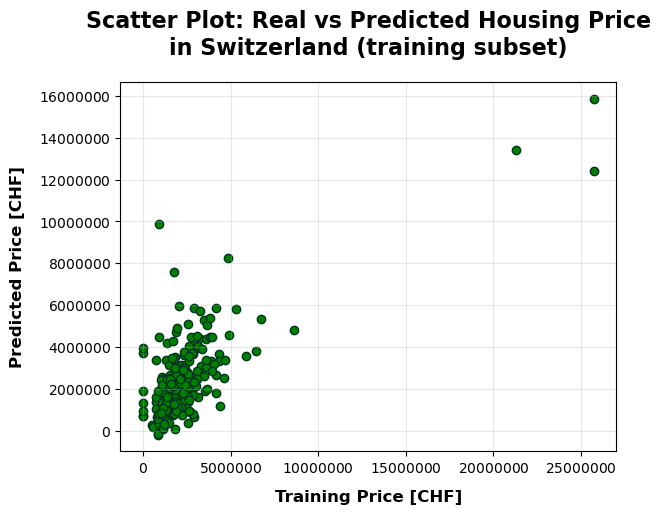

In [ ]:
plt.scatter(y_train, y_pred_train, color="green", edgecolor= "#013220", label="Predicted", marker='o')
plt.title("Scatter Plot: Real vs Predicted Housing Price\nin Switzerland (training subset)", 
          pad=20, loc="center", 
          fontdict={"size":16, 
                    "weight": "bold",
                    })
plt.xlabel("Training Price [CHF]", labelpad=10, fontdict={"size":12, 
                    "weight": "bold",
                    })
plt.ylabel("Predicted Price [CHF]", labelpad=10, fontdict={"size":12, 
                    "weight": "bold",
                    })
# Set the y-axis formatter
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_formatter(formatter)
plt.grid(visible=True, axis="both", alpha=0.3)
plt.show()

The R² score, or coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where:  
- 0 indicates that the model explains none of the variability of the response data around its mean.
- 1 indicates that the model explains all the variability of the response data around its mean.

In [ ]:
# check how good the prediction was => R2 Score
r2_score(y_train, y_pred_train)

0.554926098350299

### 7.4 Predict Price (testing data)

In [ ]:
# try model with testing data 
y_pred_test = lr.predict(X_test)

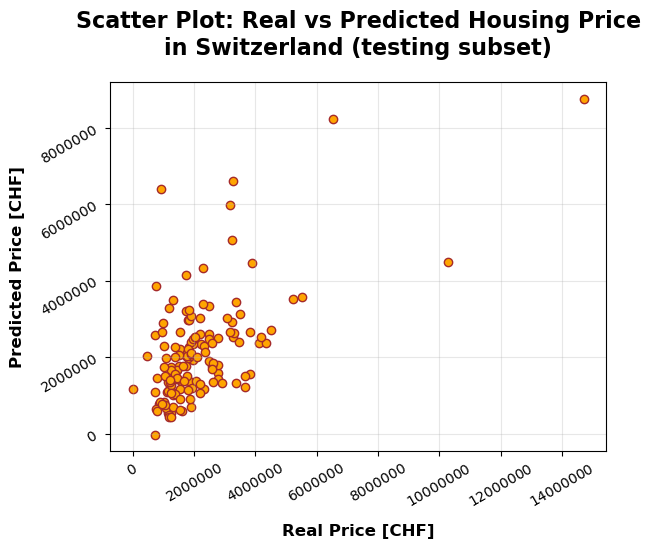

In [ ]:
plt.scatter(y_test, y_pred_test, color="orange", edgecolors="brown", label="Predicted", marker='o')
plt.title("Scatter Plot: Real vs Predicted Housing Price\nin Switzerland (testing subset)", 
          pad=20, loc="center", 
          fontdict={"size":16, 
                    "weight": "bold",
                    })
plt.xlabel("Real Price [CHF]", 
           labelpad=10, 
           fontdict={"size":12, 
                    "weight": "bold",
                    })
plt.ylabel("Predicted Price [CHF]", 
           labelpad=10, 
           fontdict={"size":12, 
                    "weight": "bold",
                    })
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.grid(visible=True, axis="both", alpha=0.3)
plt.show()

In [ ]:
# check how good the prediction was => R2 Score
r2_score(y_test, y_pred_test)

0.329281646057879

### 7.5 Conclusion

**Conclusions:**  

*Variance Explanation*:  
Approximately 32.93% of the variance in the dependent variable is explained by the independent variable(s) in your model. This means that the model accounts for about one-third of the variability in the outcome variable.  
  
*Model Fit and Context*:  
Although an r2 value of 0.329 is not high, the linear trend between the dependent variables and the independent variable (price) is present. Based on the results above, the variance of around 67.07% is not explaioned by the model (or variation of the dependent variables).  
This may happen for a bunch of reasons like:  
- In the model used, I did not consider the city where the real estate property is located (the city or surrounding playing a huge influence on the price of the property)
- Real estate market is generally more variant when it comes to pricing compared for example with the stock market. If on the stock market the stocks are bought and sold at the current market price, the real estate market contains a lot of undervalued or discounted options for buyers to take advantage of. Since the real estate is considered a non-liquid asset, a lot of sellers are sometimes pushed by circumstances to reduce the price in order to obtain a faster sell of property, which finally leads to reduction of the linear behavior of predicting model.
- There are plenty of other social factors when it comes to real estate that influence its price. Here some important ones would be: proximity to public transport and positioning with respect to relevant city or town main regions, proximity of stores in the neighborhood, the noise in the region, etc. Usually all these characteristics play an important role in the evaluation of the real estate property.  
  
The project aimed the analysis of a small dataset of Switzerland real estate properties. I tried to create 1 simple and one multiple linear regression models to predict the property prices based on specific dependent variables. The final results can be considered good and resonable for the chosen industry. 

For a more precise model additional characteristics of the properties are needed. 